In [1]:
# 필요한 패키지 설치
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['figure.dpi'] = 300

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
df_sp=df[:50000]

In [9]:
df_sp1= df_sp[['BMI','PhysicalHealth','MentalHealth']]

In [10]:
df_sp1.describe()

,BMI,PhysicalHealth,MentalHealth
count,50000.000000,50000.000000,50000.000000
mean,27.971388,3.539560,3.984260
std,6.239799,8.094921,7.979439
min,12.400000,0.000000,0.000000
25%,23.710000,0.000000,0.000000
50%,26.960000,0.000000,0.000000
75%,31.010000,2.000000,4.000000
max,87.050000,30.000000,30.000000


## 이상치란?
- outlier
- 이상치는 중요함 why?

- 이상치를 제거하는 경우
- 이상치를 제거하지 않고 사용해야 하는 경우
- 이상치를 따로 분리해서 사용해야 하는 경우
- 이상치만 찾아야 하는 경우

## 이상치의 기준이 무엇인가?
- iqr  사분위수 - > 통계적으로 바라보는 이상치
    - 단순한 통계치인 것
    - 맹신하고 우리가 이상치를 제거할 때 바로 사용하면 안 된다.
    
- 학교 평균 점수 인데 수학, 과학, 영어의 반 평균이 30 , 근데 A라는 학생은 100, 100, 100 100점만점에
- 이상치 -> 제거한다? 왜? 통계치라서?

- 120점? 130점? 있을 수 없는 값 (잘못된 이상치값) 날려야 하는 경우가 있다. ( 논리적으로 맞지 않는 값들 ) 
- 이상치는 도메인적으로 같이 봐야 한다.

- 고객 데이터 볼 때 -> 주문 평균 20만 원,A 집단은 평균이 1,000만 원 -> 날리면 일반적인 고객 보는 것
- 양봉구조 ,다봉이 될 수 있다. -> 군집을 나눠서 우리가 세분화 해서 분석할 수 있고
- 이상치의 새로운 파생변수를 만들어서, 이상치에 대해서 가중치를 둘 수 있다.

In [12]:
df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

<Axes: ylabel='BMI'>

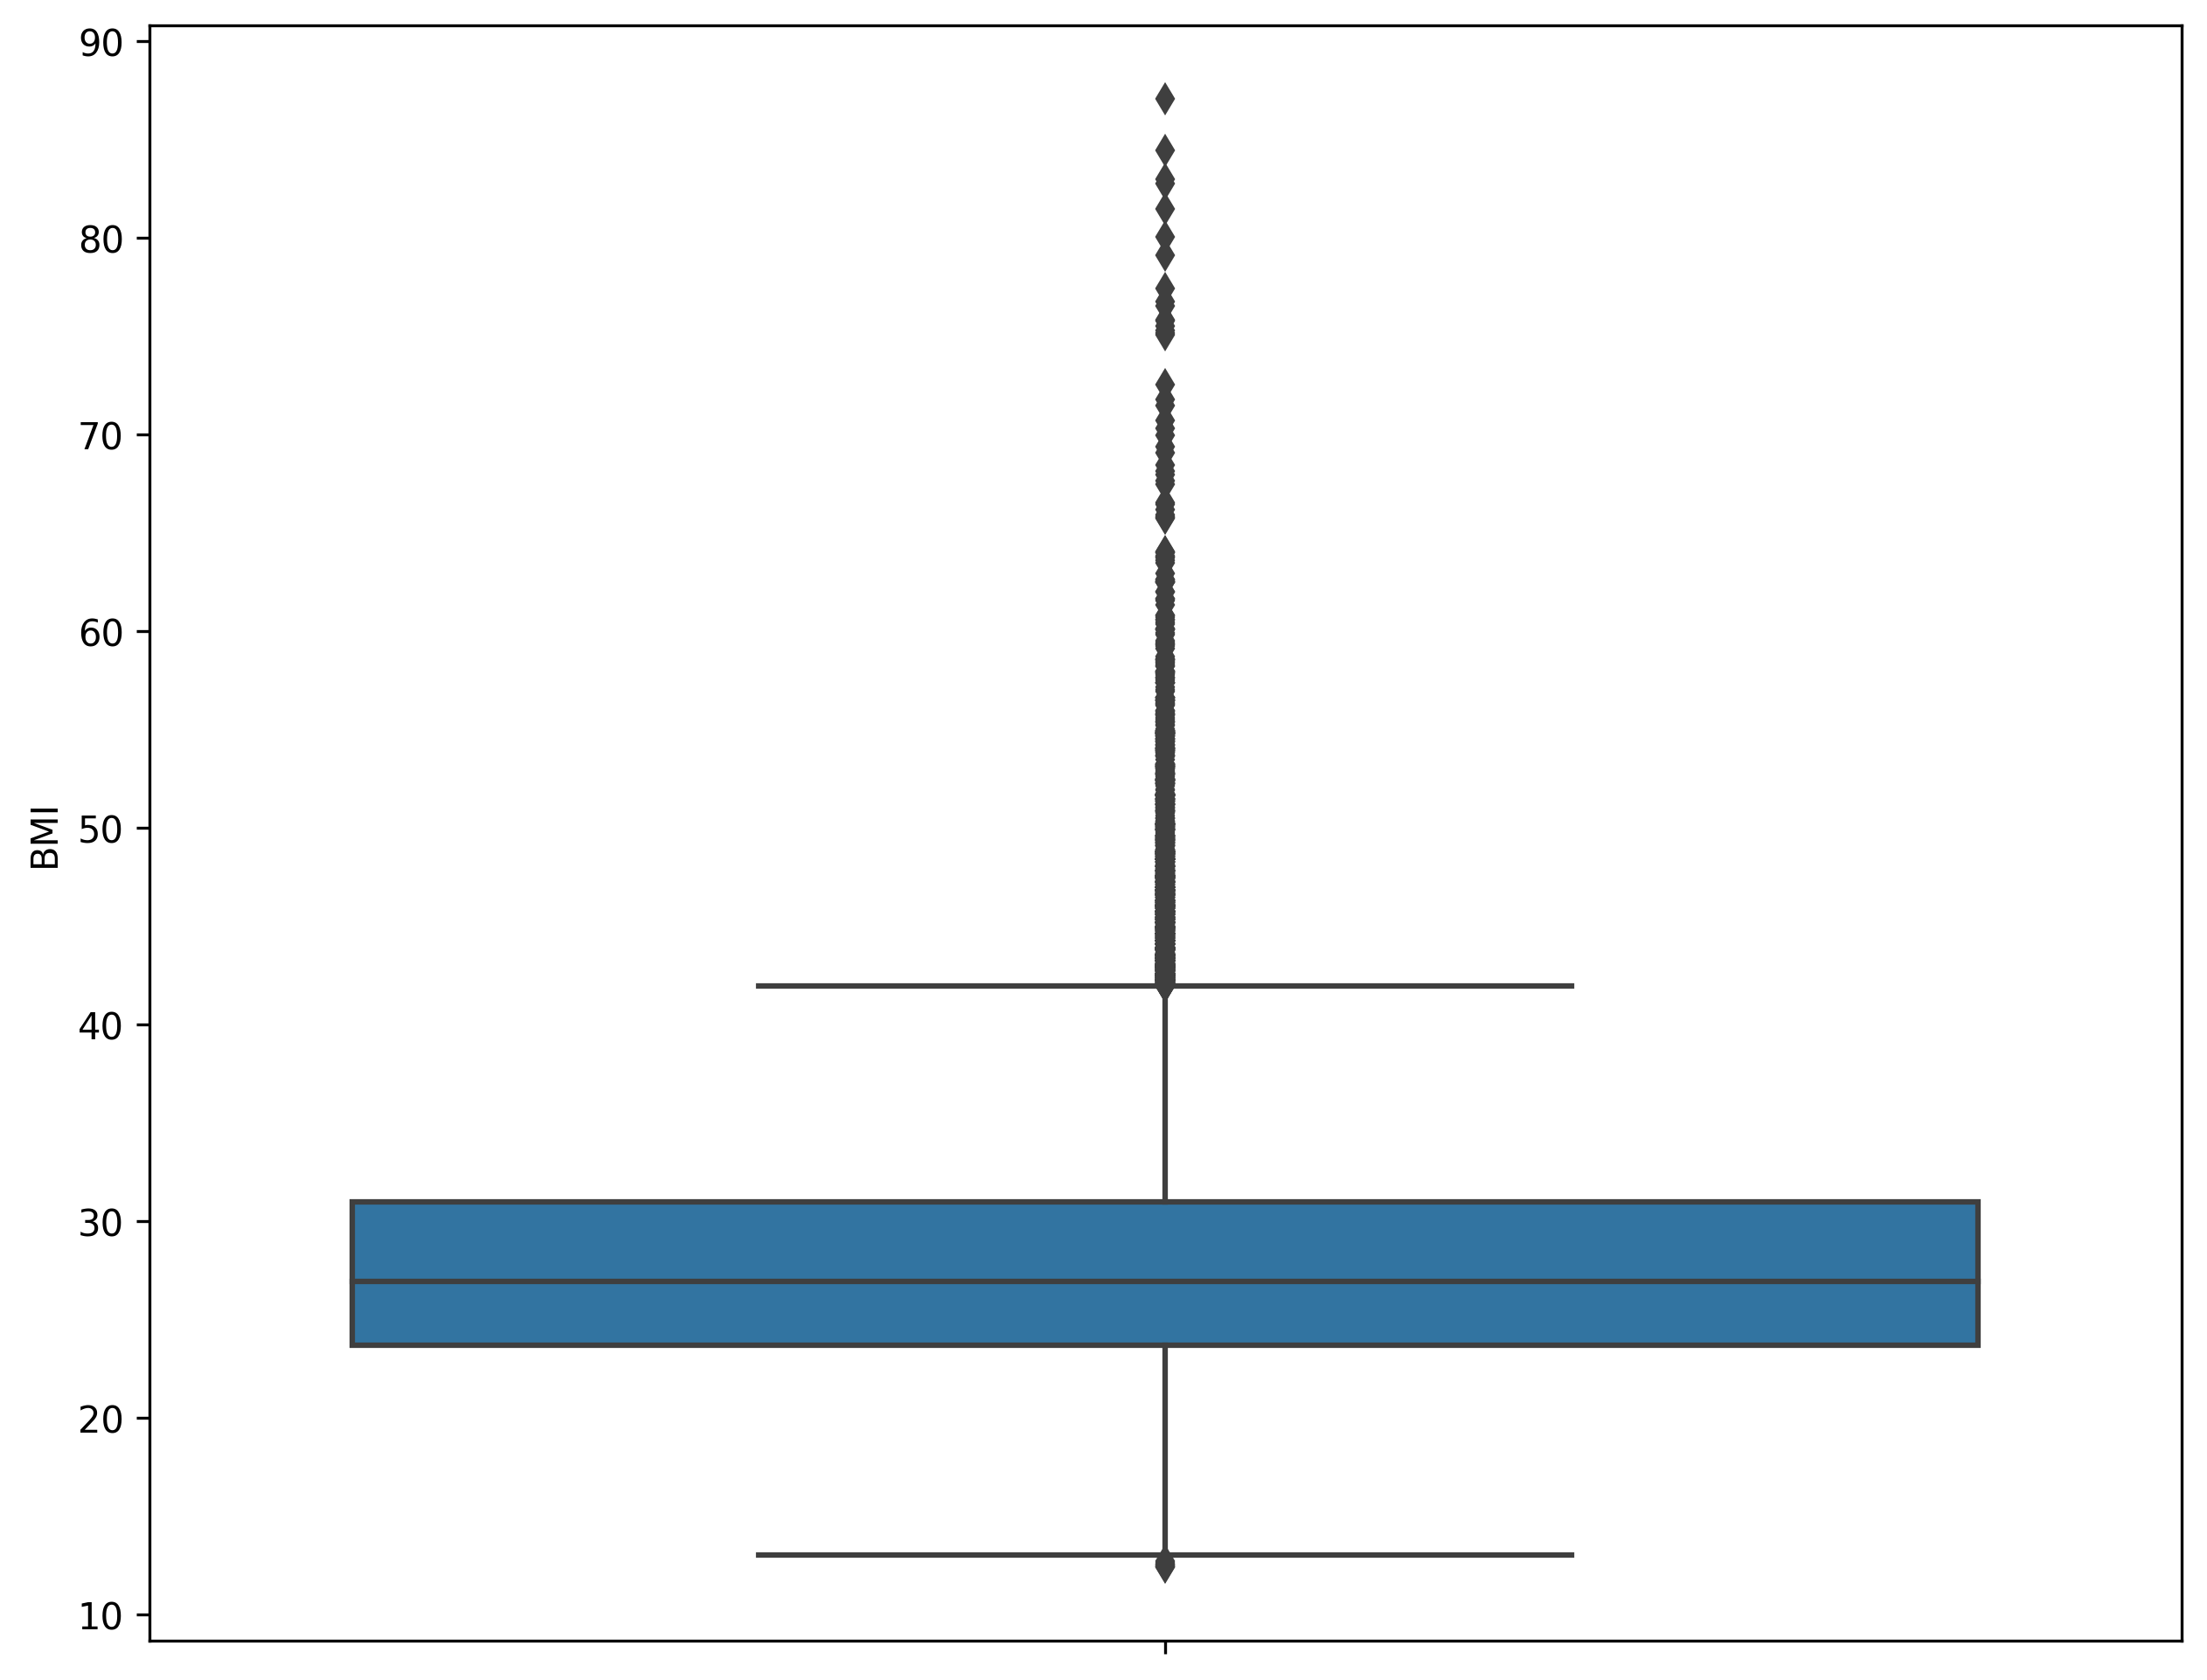

In [14]:
# 이상치 바라보는 그래프 boxplot

plt.figure(figsize=(10,8))
sns.boxplot(y='BMI',data =df_sp1)

In [18]:
df.groupby('HeartDisease')['BMI'].median()

HeartDisease
No     27.26
Yes    28.34
Name: BMI, dtype: float64

In [19]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [21]:
df[df['HeartDisease']=='Yes'].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,27373.000000,27373.000000,27373.000000,27373.000000
mean,29.401592,7.808242,4.641764,7.136156
std,6.577151,11.487819,9.171932,1.780863
min,12.210000,0.000000,0.000000,1.000000
25%,25.060000,0.000000,0.000000,6.000000
50%,28.340000,0.000000,0.000000,7.000000
75%,32.690000,15.000000,4.000000,8.000000
max,83.330000,30.000000,30.000000,24.000000


In [22]:
df[df['HeartDisease']=='No'].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,292422.000000,292422.000000,292422.000000,292422.000000
mean,28.224658,2.956416,3.828778,7.093416
std,6.325660,7.400378,7.828079,1.399331
min,12.020000,0.000000,0.000000,1.000000
25%,23.890000,0.000000,0.000000,6.000000
50%,27.260000,0.000000,0.000000,7.000000
75%,31.320000,1.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


- 이상치를 날리는 IQR 함수 만들기

In [29]:
# Q1, Q3범위 정하기
Q1=df_sp1['BMI'].quantile(0.25)
Q3=df_sp1['BMI'].quantile(0.75)
IQR = Q3- Q1 # IQR값 계산 
rev_range=2 # 범위조절변수

In [34]:
# 이상치 범위 설정
filter=(df_sp1['BMI']>=Q1-rev_range*IQR) &(df_sp1['BMI']<=Q3+rev_range*IQR)

In [36]:
df_rm=df_sp1.loc[filter]

In [39]:
df_sp1['BMI'].describe()

count    50000.000000
mean        27.971388
std          6.239799
min         12.400000
25%         23.710000
50%         26.960000
75%         31.010000
max         87.050000
Name: BMI, dtype: float64

In [38]:
df_rm['BMI'].describe()

count    49239.000000
mean        27.609147
std          5.500857
min         12.400000
25%         23.670000
50%         26.690000
75%         30.810000
max         45.610000
Name: BMI, dtype: float64

<Axes: ylabel='BMI'>

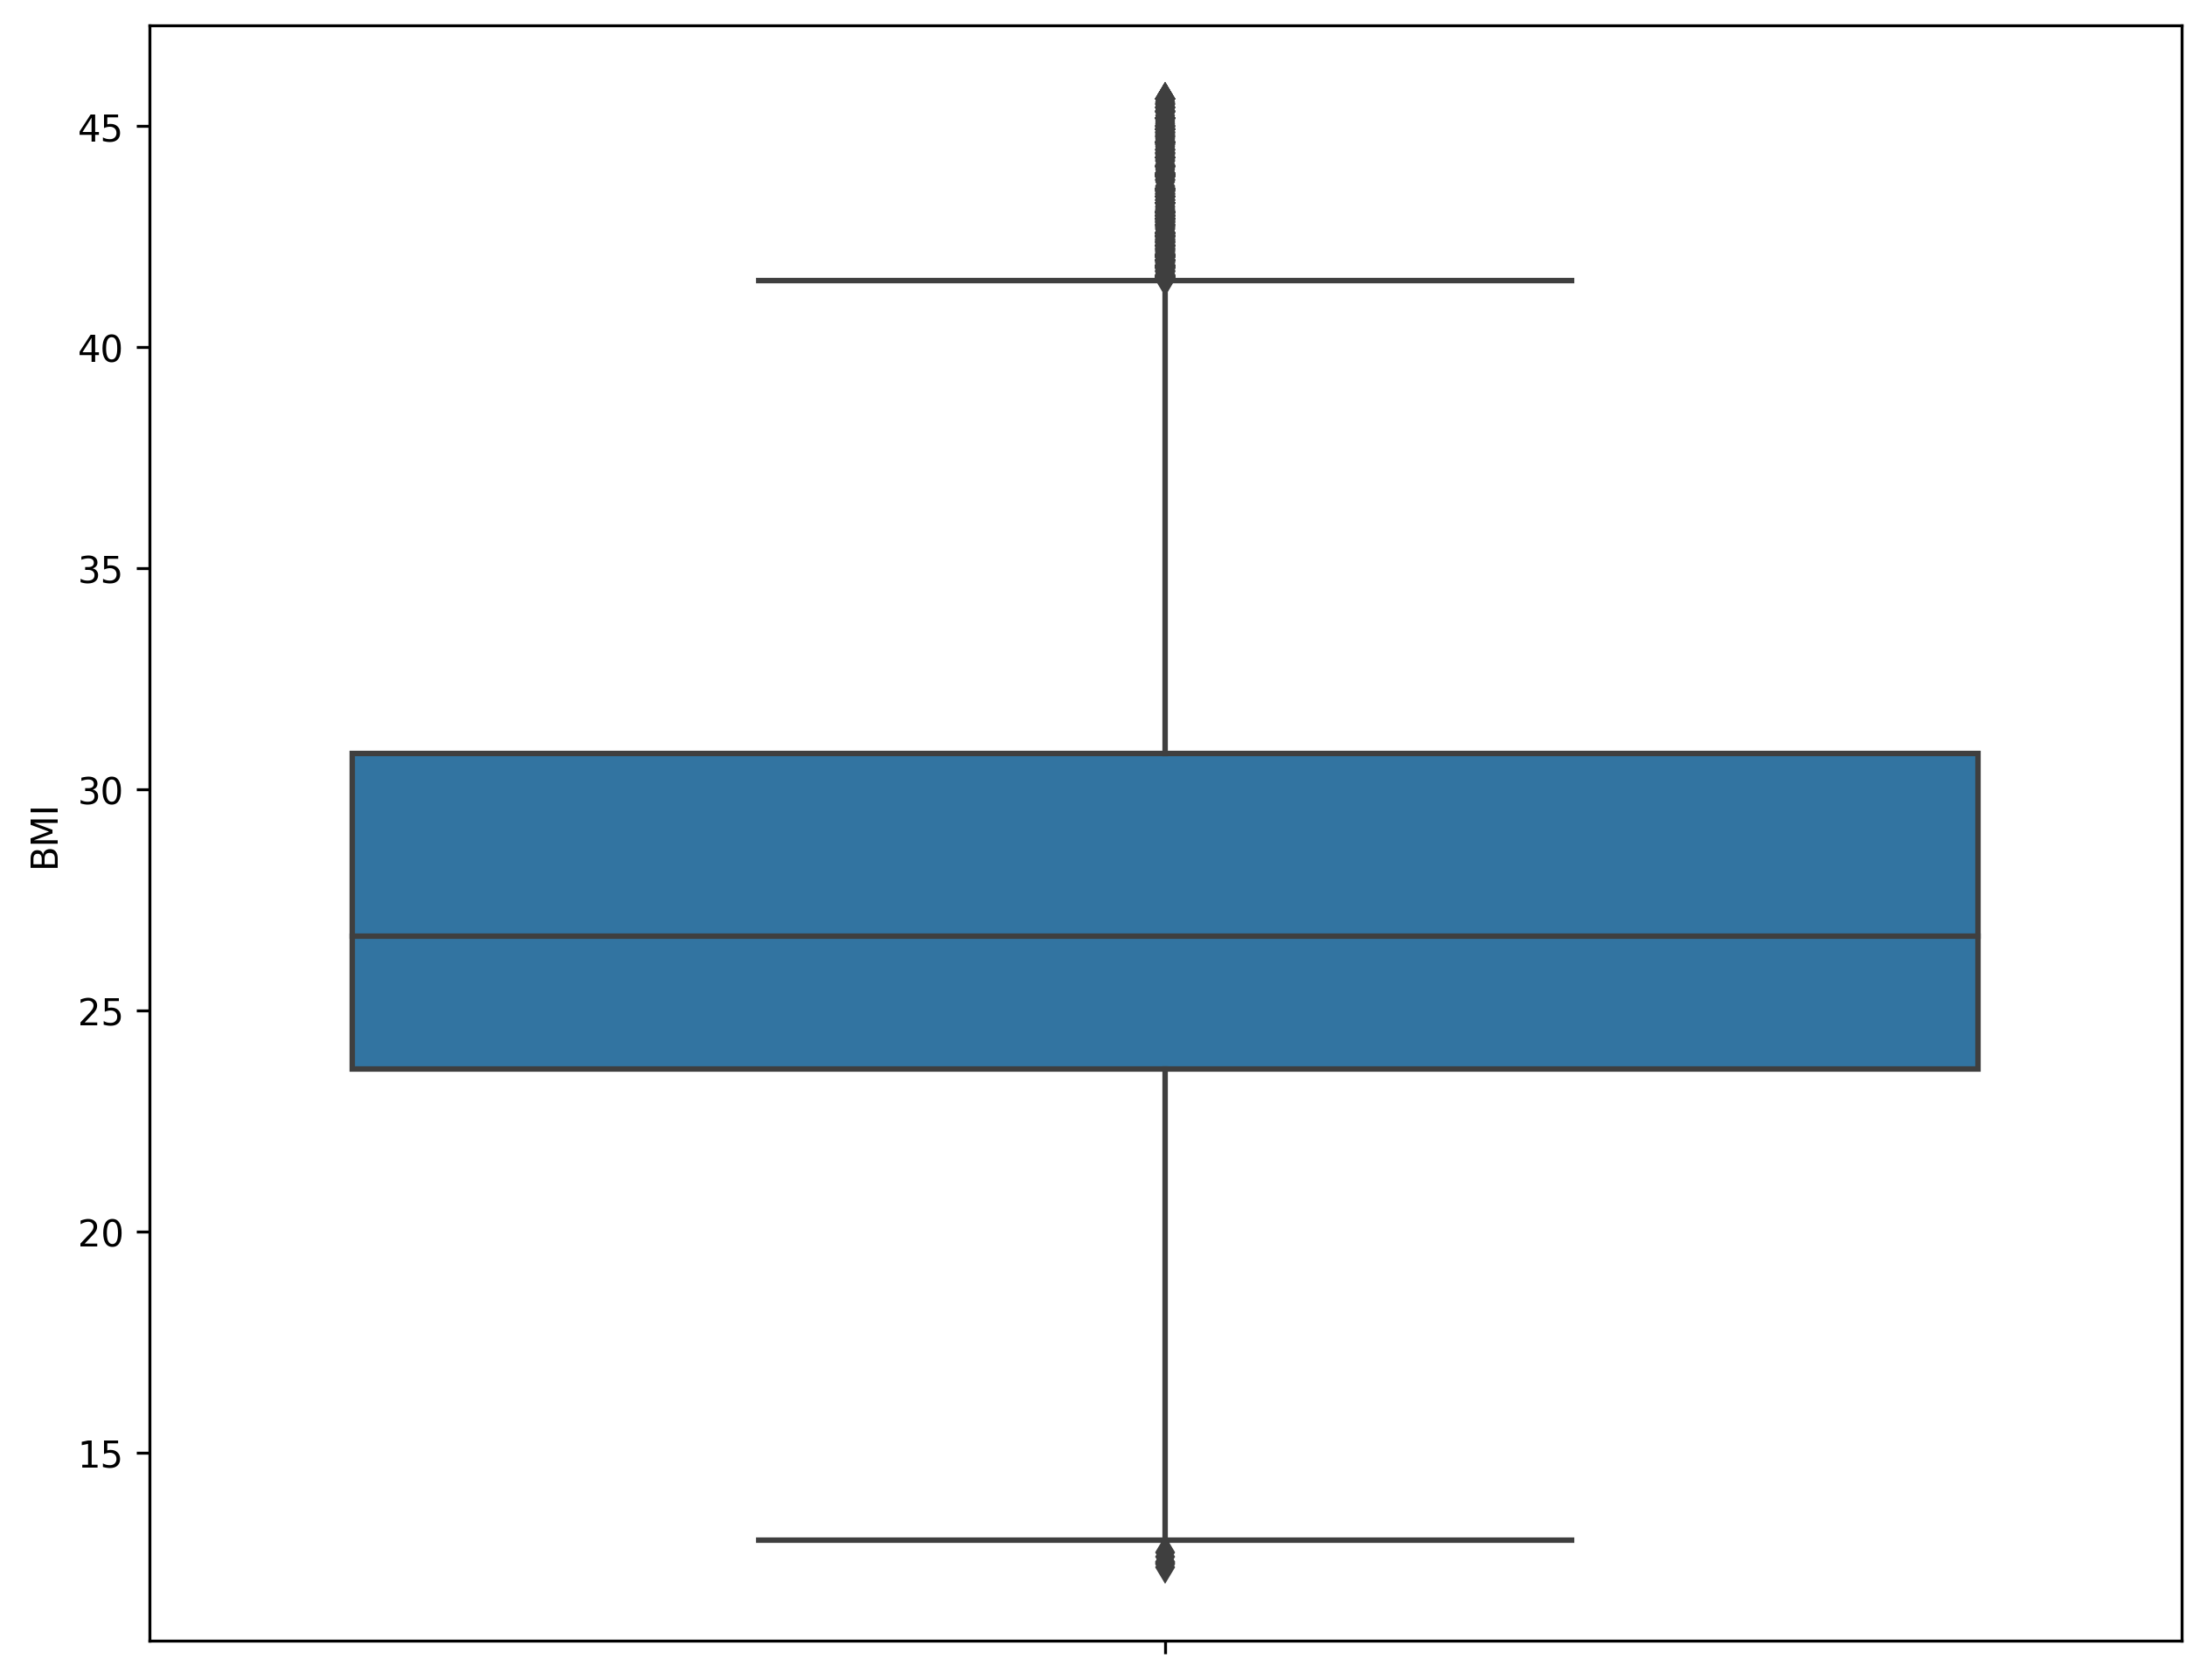

In [40]:
# 이상치 바라보는 그래프 boxplot

plt.figure(figsize=(10,8))
sns.boxplot(y='BMI',data =df_rm)

### 간단한 회귀분석을 통해 이상치를 제거했을 때 영향이 어떤 식으로 바뀌는지 확인해 보자!
- 수치적으로 바라봤을 때 이상치를 계속 제거하면 어떤 현상이 일어날까?

In [47]:
df1= df_sp[['BMI','SleepTime']]

In [51]:
df1

,BMI,SleepTime
0,16.60,5.0
1,20.34,7.0
2,26.58,8.0
3,24.21,6.0
4,23.71,8.0
...,...,...
49995,21.62,8.0
49996,35.26,7.0
49997,28.17,6.0
49998,27.02,6.0


### 이상치를 제거하지 않고 먼저 진행해 보자!

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_67029/1025190468.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['SleepTime'])


<Axes: xlabel='SleepTime', ylabel='Density'>

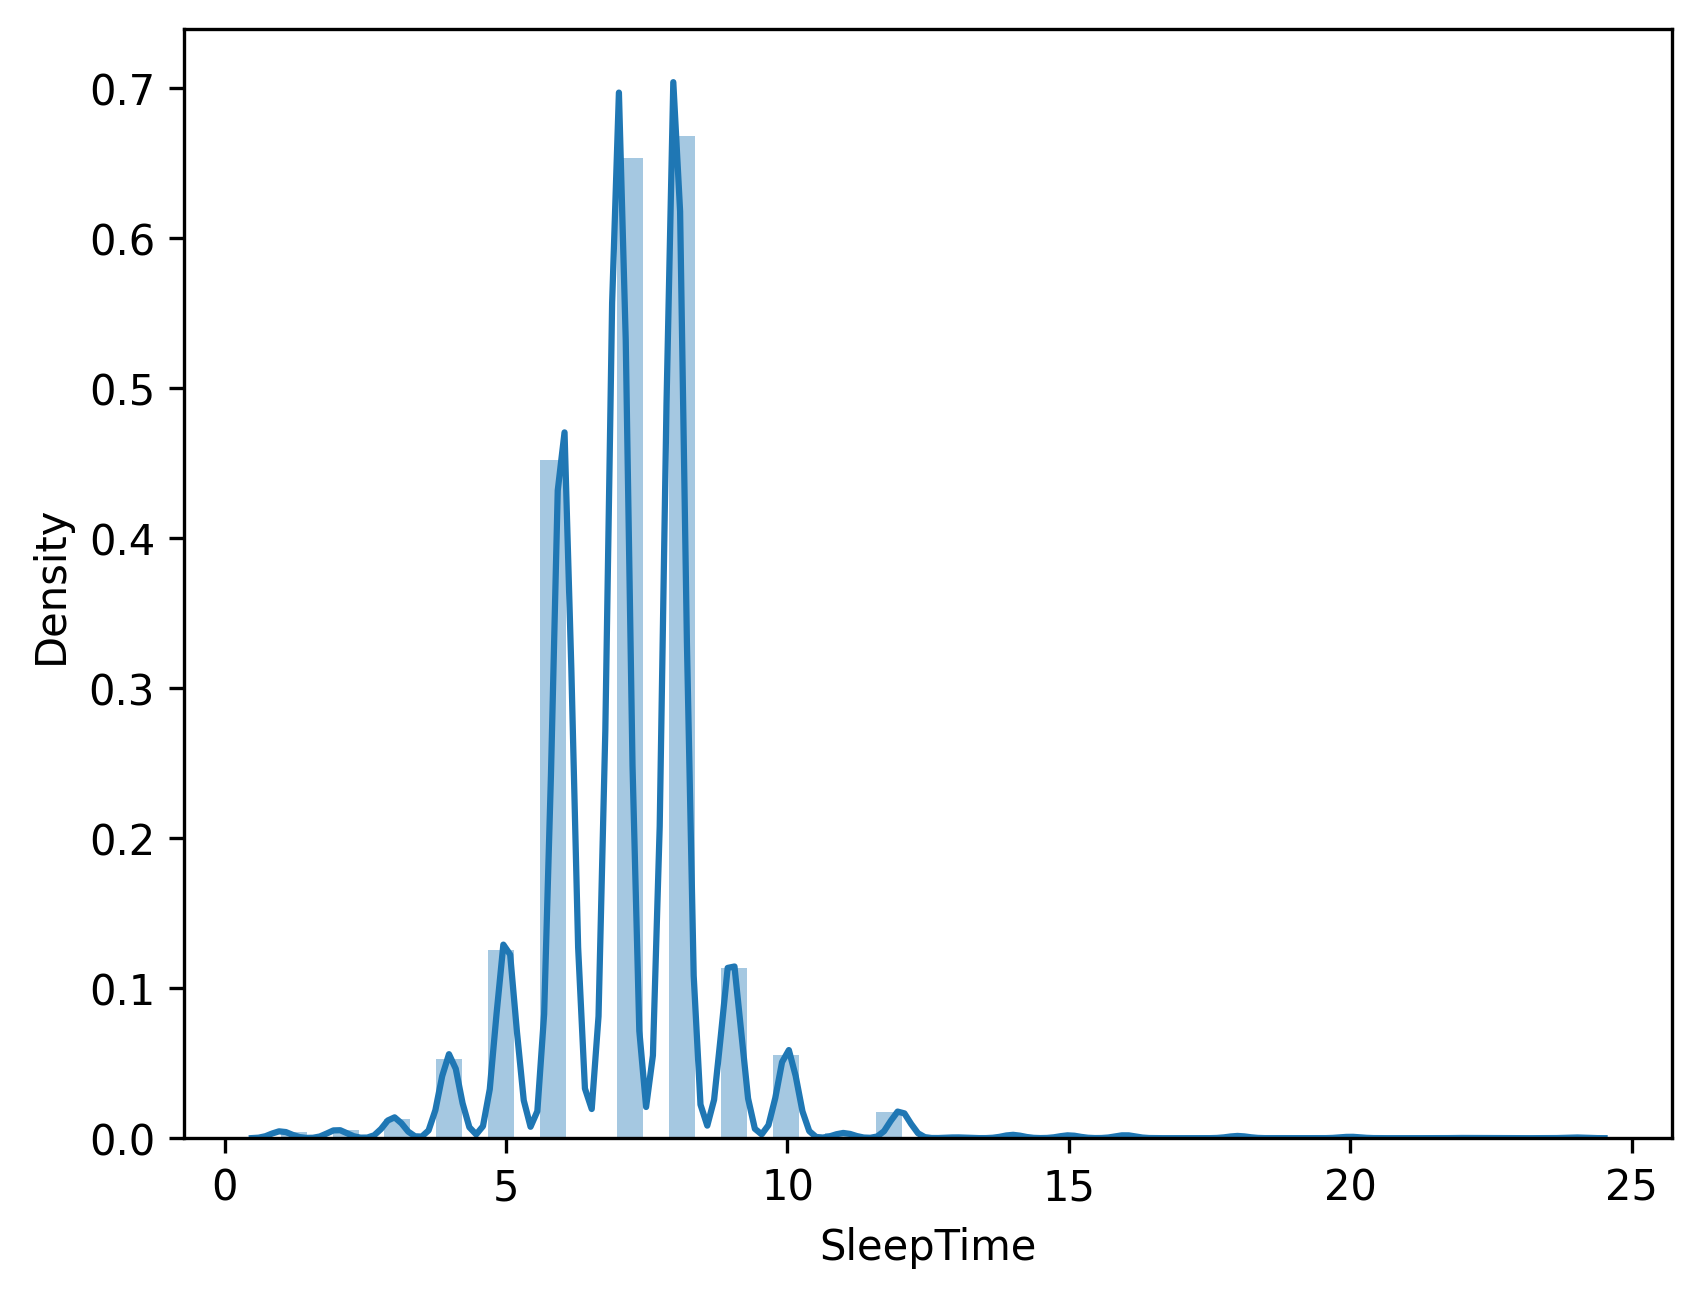

In [52]:
sns.distplot(df1['SleepTime'])

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_67029/1759077668.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

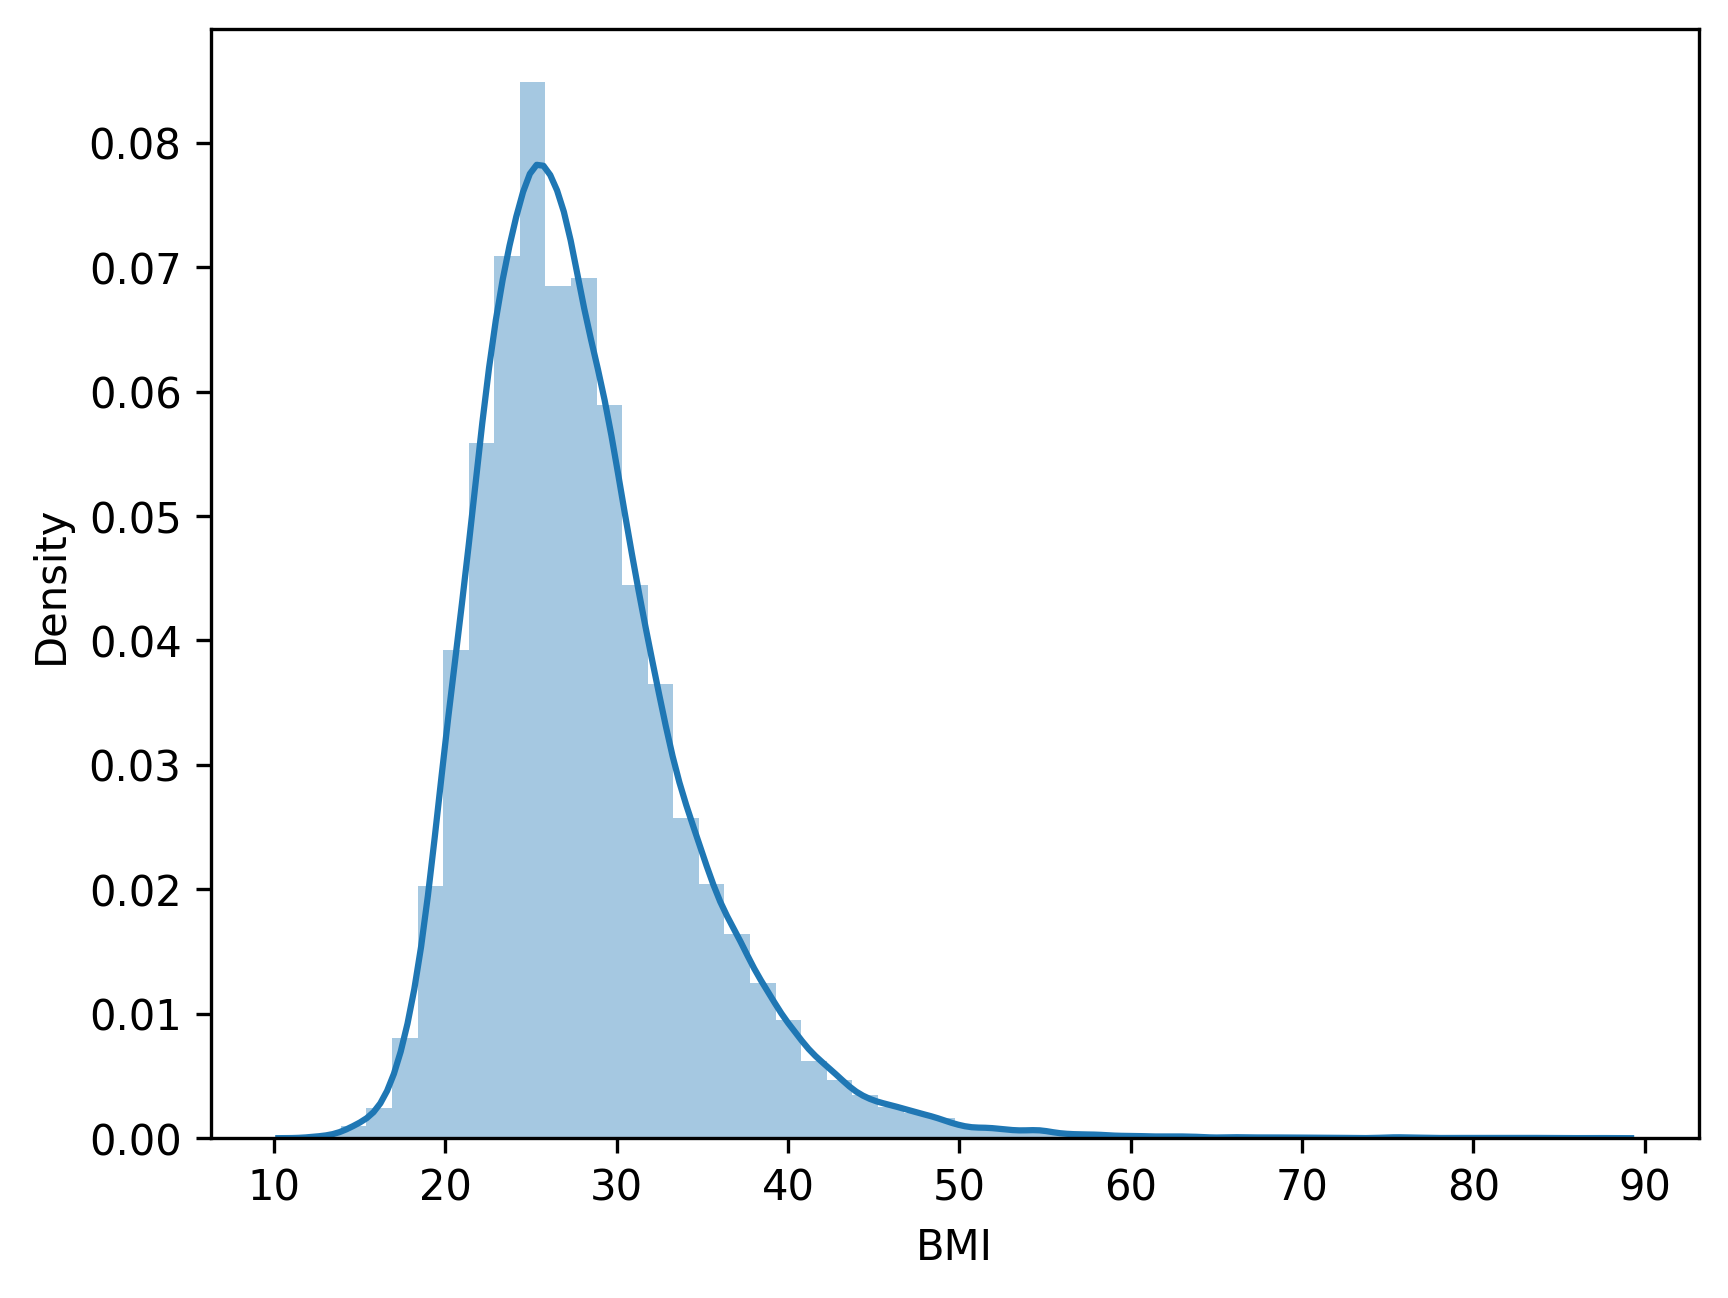

In [53]:
sns.distplot(df1['BMI'])

- 회귀분석을 통해서 둘을 확인해 보자!

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE 

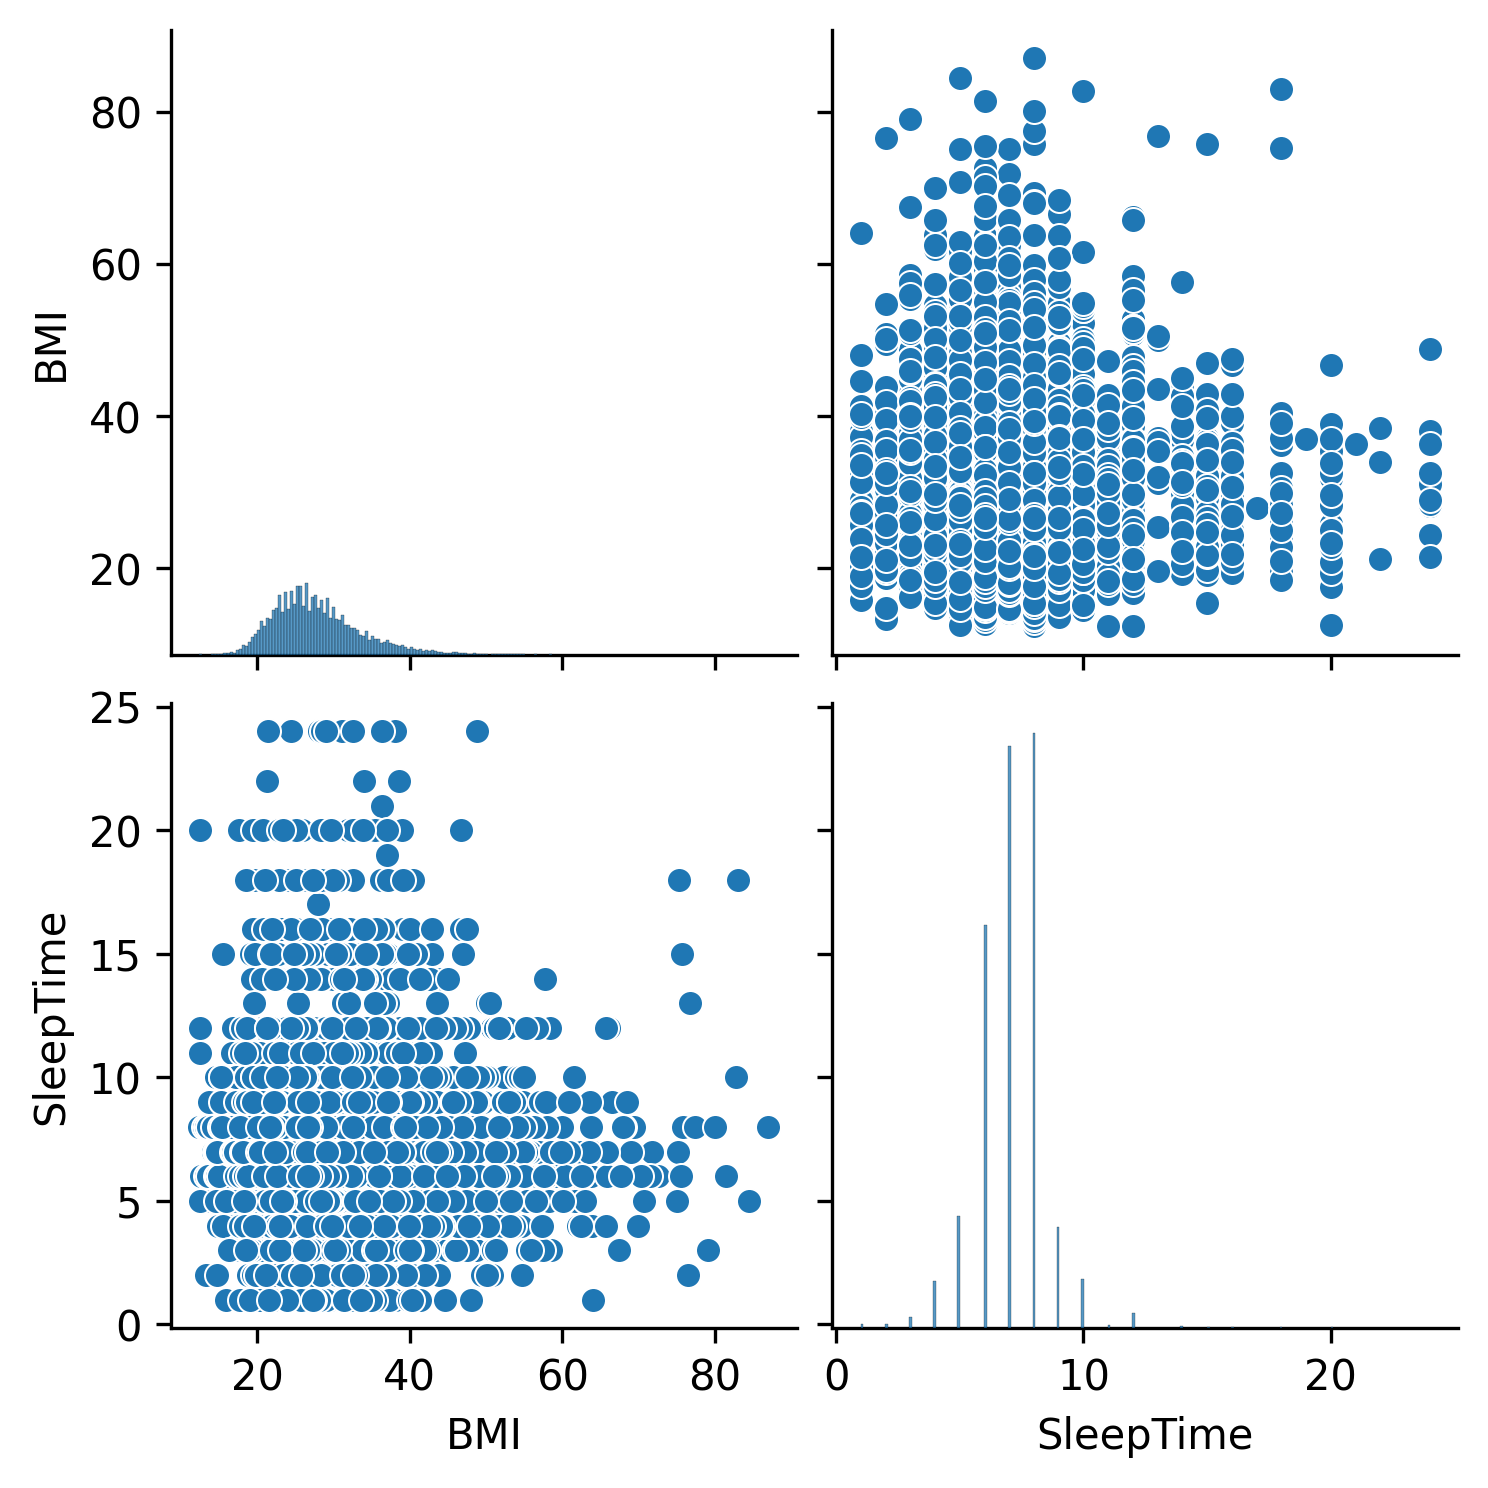

In [58]:
sns.pairplot(df1[['BMI','SleepTime']])

In [63]:
x = df1['SleepTime']

y = df1['BMI']

In [66]:
# train_test 분리 나누기


X_train, X_test, y_train, y_test= train_test_split(x,y,train_size=0.7, test_size=0.3)

In [68]:
print('train 수:',len(X_train))
print('test 수:',len(X_test))

train 수: 35000
test 수: 15000


In [73]:
import numpy as np

In [74]:
np.array(X_train).reshape(-1,1) # 요구사항에 맞춰서 변형

array([[8.],
       [8.],
       [8.],
       ...,
       [8.],
       [6.],
       [7.]])

In [75]:
# 회귀모델 불러와서 비교 분석하기

mreg = LinearRegression(fit_intercept=True)
mreg.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [77]:
X_test

5188      8.0
37831     4.0
2662      7.0
40309     8.0
9936      8.0
         ... 
40673    12.0
1546      5.0
28836     7.0
38843     6.0
2194      7.0
Name: SleepTime, Length: 15000, dtype: float64

In [86]:
# 예측값을 보고 변화를 확인할 예정
y_pred1=mreg.predict(np.array(X_test).reshape(-1,1))

In [87]:
y_pred1

array([27.78536211, 28.58157495, 27.98441532, ..., 27.98441532,
       28.18346853, 27.98441532])

In [92]:
print('R-square:{:.5f}'.format(mreg.score(np.array(X_train).reshape(-1,1), y_train))) 
#훈련데이터의 결정계수 확인
#결정계수 : 회귀분석에서 모델의 적합도 확인, 0과1 사이의 값을 가지며 값이 높을수록 성능이 좋은 모델

R-square:0.00226


In [91]:
print('R-square:{:.5f}'.format(mreg.score(np.array(X_test).reshape(-1,1), y_test)))

R-square:0.00052


In [111]:
ols_m=sm.OLS(y_test, sm.add_constant(X_test)).fit()

ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     44.01
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           3.38e-11
Time:                        22:39:46   Log-Likelihood:                -48304.
No. Observations:               14907   AIC:                         9.661e+04
Df Residuals:                   14905   BIC:                         9.663e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7339      0.273    108.950      0.000      29.199      30.269
SleepTime     -0.2507      0.038     -6.634      0.000      -0.325      -0.177
==============================================================================
Omnibus:                     3941.682   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13876.340
Skew:                           1.308   Prob(JB):                         0.00
Kurtosis:                       6.936   Cond. No.                         39.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 통계치를 가지고 이상치를 제거했을 경우

In [96]:
df1

,BMI,SleepTime
0,16.60,5.0
1,20.34,7.0
2,26.58,8.0
3,24.21,6.0
4,23.71,8.0
...,...,...
49995,21.62,8.0
49996,35.26,7.0
49997,28.17,6.0
49998,27.02,6.0


In [97]:
# Q1, Q3범위 정하기
Q1=df1['SleepTime'].quantile(0.25)
Q3=df1['SleepTime'].quantile(0.75)
IQR = Q3- Q1 # IQR값 계산 
rev_range=2 # 범위조절변수

# 이상치 범위 설정
filter=(df1['SleepTime']>=Q1-rev_range*IQR) &(df1['SleepTime']<=Q3+rev_range*IQR)

#df_rm=df1.loc[filter]

In [99]:
df_rm= df1.loc[filter]

In [100]:
#SleepTime의 이상치를 단순 IQR로 제거한 경우 
df_rm

,BMI,SleepTime
0,16.60,5.0
1,20.34,7.0
2,26.58,8.0
3,24.21,6.0
4,23.71,8.0
...,...,...
49995,21.62,8.0
49996,35.26,7.0
49997,28.17,6.0
49998,27.02,6.0


### SleepTime 이상치를 제거하고 다시 회귀분석 진행

In [101]:
# train_test 분리 나누기
x = df_rm['SleepTime']

y = df_rm['BMI']

X_train, X_test, y_train, y_test= train_test_split(x,y,train_size=0.7, test_size=0.3)

print('train 수:',len(X_train))
print('test 수:',len(X_test))

train 수: 34782
test 수: 14907


In [102]:
# 회귀모델 불러와서 비교 분석하기

mreg1 = LinearRegression(fit_intercept=True)
mreg1.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [103]:
# 예측값을 보고 변화를 확인할 예정
y_pred2=mreg1.predict(np.array(X_test).reshape(-1,1))

In [104]:
y_pred2

array([27.70136691, 27.99170018, 28.28203346, ..., 27.70136691,
       27.70136691, 27.99170018])

- 기존 이상치 제거 전의 R2 값
- R-square:0.00226
- R-square:0.00052

In [106]:
print('R-square train:{:.5f}'.format(mreg1.score(np.array(X_train).reshape(-1,1), y_train)))
print('R-square test :{:.5f}'.format(mreg1.score(np.array(X_test).reshape(-1,1), y_test)))

R-square train:0.00386
R-square test :0.00287


In [110]:
ols_m1=sm.OLS(y_test, sm.add_constant(X_test)).fit()

ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     44.01
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           3.38e-11
Time:                        22:39:36   Log-Likelihood:                -48304.
No. Observations:               14907   AIC:                         9.661e+04
Df Residuals:                   14905   BIC:                         9.663e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7339      0.273    108.950      0.000      29.199      30.269
SleepTime     -0.2507      0.038     -6.634      0.000      -0.325      -0.177
==============================================================================
Omnibus:                     3941.682   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13876.340
Skew:                           1.308   Prob(JB):                         0.00
Kurtosis:                       6.936   Cond. No.                         39.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 여기서 한 번 더 이상치를 제거하면 어떻게 될까?

<Axes: ylabel='SleepTime'>

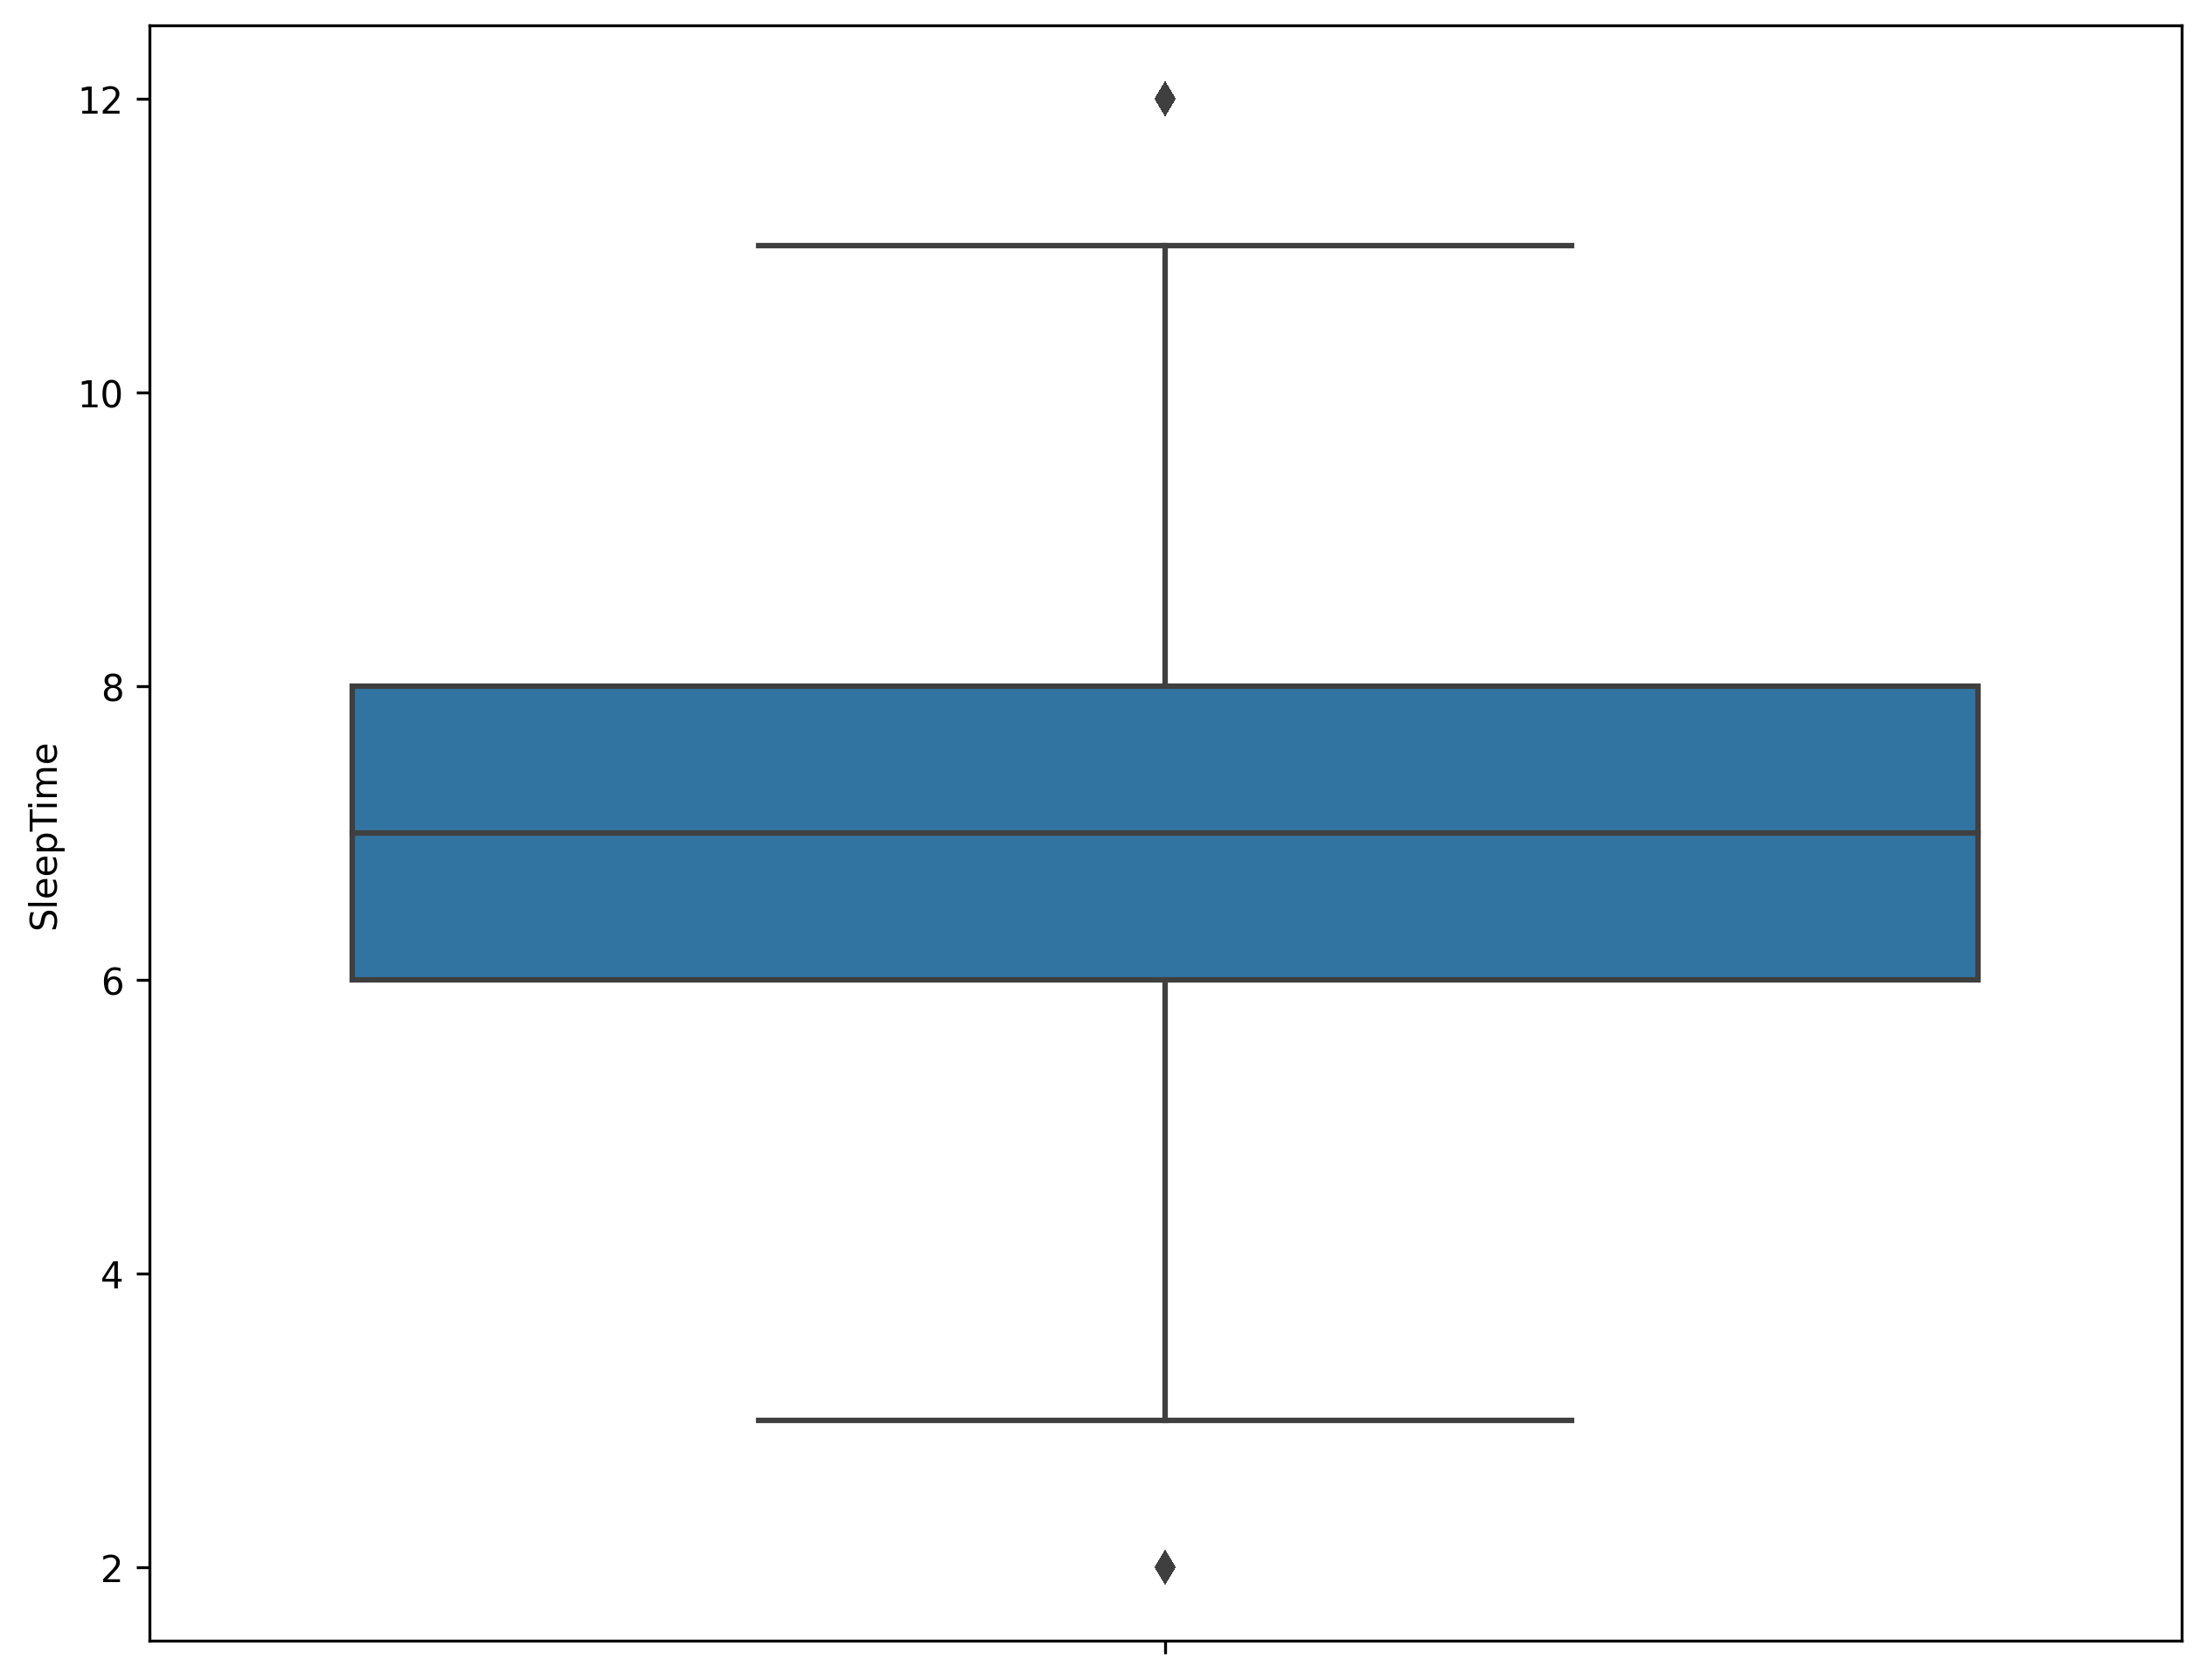

In [108]:
# 이상치 바라보는 그래프 boxplot

plt.figure(figsize=(10,8))
sns.boxplot(y='SleepTime',data =df_rm)

## 다시 한 번 이상치를 제거하고 분석을 진행

In [109]:
df_rm

,BMI,SleepTime
0,16.60,5.0
1,20.34,7.0
2,26.58,8.0
3,24.21,6.0
4,23.71,8.0
...,...,...
49995,21.62,8.0
49996,35.26,7.0
49997,28.17,6.0
49998,27.02,6.0


In [112]:
# Q1, Q3범위 정하기
Q1=df_rm['SleepTime'].quantile(0.25)
Q3=df_rm['SleepTime'].quantile(0.75)
IQR = Q3- Q1 # IQR값 계산 
rev_range=2 # 범위조절변수

# 이상치 범위 설정
filter=(df_rm['SleepTime']>=Q1-rev_range*IQR) &(df_rm['SleepTime']<=Q3+rev_range*IQR)

#df_rm=df1.loc[filter]

In [113]:
df_rm1=df_rm.loc[filter]

In [115]:
df_rm1

,BMI,SleepTime
0,16.60,5.0
1,20.34,7.0
2,26.58,8.0
3,24.21,6.0
4,23.71,8.0
...,...,...
49995,21.62,8.0
49996,35.26,7.0
49997,28.17,6.0
49998,27.02,6.0


## 필수과제1
- 공유 드린 데이터셋으로 이상치를 2번 이상 제거하여-> 실제 R2, MSE 값이 어떻게 변하는지 정리해서 확인해 주세요!
- 시각화를 통해서 이상치의 분포 및 제거 했을 때 어떤 식으로 바뀌는지도 같이 꼭 그래프를 그려주세요~!
- 최종적으로 base, 이상치제거1, 이상치제거2 -> 비교 표를 만들어 주세요!
- 이상치 제거하면서 변화하는 RMSE, R2 내용을 정리 부탁드립니다.
- 이상치 제거시 Rev_range 조절해서 값도 같이 봐주세요!
- 아래의 캘리포니아 데이터를 가지고 직접 진행해 주세요!

- 해당 피처들의 설명은 정리해서 같이 공유드리겠습니다.

###  이상치를 계속해서 제거하면 -> 이상치의 영향도를 줄이는 것-> R2  MSE 좋아질 수 밖에 없다.
### 그게 과연 맞는 방향인가? 라는 것에 대해서 고민해야 할 필요가 있다.

### 이상치를 날리지 않고도 성능이 조금은 더 좋아질 수 있는 방법이 있지 않을까?
### 파생변수를 하나 만들어서 실제 성능이 조금은 좋아지는 확인해 보자!

MedInc: 해당 지역의 중간 소득. 이 값은 수천 달러 단위로 표현됩니다. 중간 소득이 높을수록 해당 지역의 주민들은 더 많은 돈을 벌고 있다는 것을 의미합니다.

HouseAge: 해당 지역의 중앙값 주택 연령. 이는 지역에 있는 주택들 중간의 연령을 나타냅니다.

AveRooms: 지역의 평균 방 갯수. 이 값은 해당 지역의 모든 주택의 방 수를 평균낸 것입니다.

AveBedrms: 지역의 평균 침실 갯수. 이 값은 해당 지역의 모든 주택의 침실 수를 평균낸 것입니다.

Population: 해당 지역의 인구. 이는 해당 지역에 살고 있는 사람들의 수를 나타냅니다.

AveOccup: 평균 주택 점유율. 이는 한 주택에 평균적으로 거주하는 사람의 수를 나타냅니다.

Latitude: 해당 지역의 위도입니다.

Longitude: 해당 지역의 경도입니다.

Target: 이는 해당 지역의 중앙값 주택 가격을 나타냅니다. 이 값은 수십만 달러 단위로 표현됩니다.



In [117]:
#사이킷런 제공하는 캘리포니아 집값 데이터 셋

from sklearn.datasets import fetch_california_housing

In [127]:
# 캘리포니아 주택 가격 데이터셋 로드
housing = fetch_california_housing()

# 데이터프레임 생성
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['Target'] = housing.target  # 목표 변수 추가

# 데이터프레임의 첫 5행 출력
print(df_housing.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [128]:
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
